In [0]:
#DATA Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line

#Monthly milk production: pounds per cow. Jan 62 - Dec 75

In [0]:
#importing essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#reading dataset as pandas datframe.
milk=pd.read_csv("monthly-milk-production.csv",index_col="Month")

In [0]:
#dataframe
milk

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
1962-06-01 01:00:00,697.0
1962-07-01 01:00:00,640.0
1962-08-01 01:00:00,599.0
1962-09-01 01:00:00,568.0


In [0]:
#Making index a timeseries.
milk.index=pd.to_datetime(milk.index)

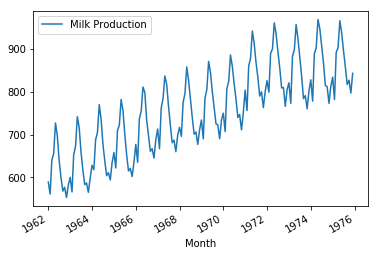

In [0]:
milk.plot()

___

In [0]:
#We will predict the 12 months ahead data by using time series analysis.

In [0]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [0]:
#Train test split in which last 12 entries will be the test data for comparisons with our predictions. everything else will be training data.
train_set=milk.head(156)
test_set=milk.tail(12)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler()

In [0]:
#Scaling the data by min_max scaler.Only transforming test by fitting into training data as we dont expect to know future behaviour
train_scaled=scaler.fit_transform(train_set)
test_scaled=scaler.transform(test_set)

In [0]:
#This function creates batches pf training data and returns to batches shifted by 1 time step!
def next_batch(training_data,batch_size,steps):
    

    rand_int=np.random.randint(0,len(training_data)-steps)
    batch_data=np.array(training_data[rand_int:rand_int+steps+1]).reshape(1,steps+1)
    return batch_data[:,:-1].reshape(-1,steps,1),batch_data[:,1:].reshape(-1,steps,1)

In [0]:
import tensorflow as tf

In [0]:
#defining necessary constants.
num_inputs=1
num_time_steps=12
num_neurons=100
num_outputs=1
learning_rate=0.01
num_iter=5000
batch_size=1

In [0]:
#defining placeholders to feed in batches pf data later in session.
X=tf.placeholder(tf.float32,shape=[None,num_time_steps,num_inputs])
y=tf.placeholder(tf.float32,shape=[None,num_time_steps,num_outputs])

In [0]:
#defining single RNN cell. you can also use BASCICRNN cell or a GRU cell.
cell=tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons,activation=tf.nn.relu),output_size=num_outputs)

In [0]:
#rolling out the single cell into different time steps.
outputs,states=tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

In [0]:
#Creating a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer
loss=tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate)
train=optimizer.minimize(loss)

In [0]:
#Initialize the global variables
init=tf.global_variables_initializer()

In [0]:
#Creating an instance of tf.train.Saver()
saver=tf.train.Saver()

In [0]:
#creting session and feeding in batches of training data.
with tf.Session() as sess:
   
    sess.run(init)
    for i in range(num_iter):
        x_batch,y_batch=next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train,feed_dict={X:x_batch,y:y_batch})
        
        if i%100==0:
            mse=sess.run(loss,feed_dict={X:x_batch,y:y_batch})
            print("Iteration={},lLoss={}".format(i,mse))
        
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

Iteration=0,lLoss=0.3555307388305664
Iteration=100,lLoss=0.013291890732944012
Iteration=200,lLoss=0.010796904563903809
Iteration=300,lLoss=0.0074959187768399715
Iteration=400,lLoss=0.009619677439332008
Iteration=500,lLoss=0.008589799515902996
Iteration=600,lLoss=0.005090691149234772
Iteration=700,lLoss=0.005557559430599213
Iteration=800,lLoss=0.008921747095882893
Iteration=900,lLoss=0.01348074059933424
Iteration=1000,lLoss=0.008008033968508244
Iteration=1100,lLoss=0.004038154613226652
Iteration=1200,lLoss=0.0017818082123994827
Iteration=1300,lLoss=0.00570037541911006
Iteration=1400,lLoss=0.004358663689345121
Iteration=1500,lLoss=0.004497047048062086
Iteration=1600,lLoss=0.0023873785976320505
Iteration=1700,lLoss=0.0038119980599731207
Iteration=1800,lLoss=0.0043905372731387615
Iteration=1900,lLoss=0.004267090931534767
Iteration=2000,lLoss=0.004509182181209326
Iteration=2100,lLoss=0.004681126214563847
Iteration=2200,lLoss=0.012479365803301334
Iteration=2300,lLoss=0.008593187667429447
Ite

______

In [0]:
#last 12 months of orignal dataset
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


In [0]:
#using our trained model to predict 12 months ahead of data
with tf.Session() as sess:
    
    # Using Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")
    my_list=list(train_scaled[-12:])
    for i in range(12):
        x_batch=np.array(my_list[-num_time_steps:]).reshape(1,num_time_steps,1)
        predictions=sess.run(outputs,feed_dict={X:x_batch})
        my_list.append(predictions[0,-1,0])
        

INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [0]:
my_list

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 0.6598872,
 0.5599241,
 0.82050705,
 0.85328424,
 0.9556481,
 0.9288611,
 0.8025014,
 0.72787946,
 0.55704063,
 0.6206851,
 0.52133596,
 0.5288242]

In [0]:
#taking the last 12 predicted values and unscaling them to show orignal values.
results=scaler.inverse_transform(np.array(my_list[-12:]).reshape(12,1))

In [0]:
#appending our predicted values to test ses to compare results.
test_set["Generated"]=results

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
test_set

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,827.513062
1975-02-01 01:00:00,782.0,785.928406
1975-03-01 01:00:00,892.0,894.330933
1975-04-01 01:00:00,903.0,907.966248
1975-05-01 01:00:00,966.0,950.549622
1975-06-01 01:00:00,937.0,939.406189
1975-07-01 01:00:00,896.0,886.840576
1975-08-01 01:00:00,858.0,855.797852
1975-09-01 01:00:00,817.0,784.728882


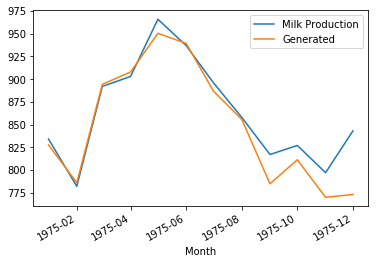

In [0]:
#Plot out the two columns for comparison.
test_set.plot()